In [253]:

import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import re
from nltk.util import bigrams, trigrams
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from better_profanity import profanity



In [254]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiyon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiyon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [255]:
followers = pd.read_csv("../Dataset/tweets/followers_data.csv")
following = pd.read_csv("../Dataset/tweets/followings_data.csv")
user = pd.read_csv("../Dataset/tweets/user_data.csv")

In [256]:
following

,user,tweets,labels,follows
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1
...,...,...,...,...
4259,user52,And she's pushing for Sharia Law in America. ...,0,following65
4260,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65
4261,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65
4262,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65


In [257]:
stopwords_set = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"b['\"]", '', text)
    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\\\w+', '', text)
    text = re.sub(r'\\x[a-fA-F0-9]{2}', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.split(r'\btruncated\b', text, maxsplit=1)[0]
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    tokens = word_tokenize(text)

    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
    text = ' '.join(filtered_tokens)

    return text


In [258]:
following['cleaned'] = following['tweets'].apply(lambda x: clean_text(x))

In [259]:
following

,user,tweets,labels,follows,cleaned
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,u complete bitch sell part deal dont u underst...
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,true barnier eu pushing u deal leaver want eu ...
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,u never celebrate st george day didnt u cover ...
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,fuck bit leave dont u understand
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,left want video muslim peaceful muslimming she...
...,...,...,...,...,...
4259,user52,And she's pushing for Sharia Law in America. ...,0,following65,shes pushing sharia law america shes dangerous
4260,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,people cant allow illegals rewrite law sharia ...
4261,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,sharia procedure hand foot chopping tie reduce...
4262,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,sharia law violates billofrights 1440 yr clash...


In [260]:
to_drop = following[following['cleaned'] == ""].index
following.drop(to_drop, inplace=True)

In [261]:
following[['tweets', 'cleaned', "labels"]]

,tweets,cleaned,labels
0,"b""@theresa_may U are a complete bitch an a sel...",u complete bitch sell part deal dont u underst...,1
1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",true barnier eu pushing u deal leaver want eu ...,4
2,"b""@theresa_may @10DowningStreet Why do u never...",u never celebrate st george day didnt u cover ...,4
3,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",fuck bit leave dont u understand,1
4,b'RT @RealitySmash: The left want this video o...,left want video muslim peaceful muslimming she...,0
...,...,...,...
4259,And she's pushing for Sharia Law in America. ...,shes pushing sharia law america shes dangerous,0
4260,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,people cant allow illegals rewrite law sharia ...,0
4261,RT @monk_asian: #Sharia's procedure of #hand a...,sharia procedure hand foot chopping tie reduce...,0
4262,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,sharia law violates billofrights 1440 yr clash...,0


In [262]:
profanity.censor("bitcH")

'****'

In [263]:
following.to_csv("../Dataset/tweets/cleaned.csv")

In [264]:
def create_ngrams(text, n):
    tokens = word_tokenize(text)
    bigrams = list(ngrams(tokens, n))
    return bigrams

In [265]:
following['bigram'] = following['cleaned'].apply(lambda x: create_ngrams(x, 2))
following['trigram'] = following['cleaned'].apply(lambda x: create_ngrams(x, 3))

In [266]:
def make_ngram_df(column='bigram', k=5):
    rows = []
    for index, row in following.groupby("labels"):
        flattened = row[column].explode().tolist()
        counter = Counter(flattened)
        for ngram, count in counter.most_common(k):
            rows.append({'category': index, column: ngram, 'count': count})

    ngram_df = pd.DataFrame(rows)
    ngram_df[column] = ngram_df[column].apply(lambda x: " ".join(x))
    return ngram_df

In [267]:
bigram_df = make_ngram_df('bigram')
bigram_df.to_csv("../Dataset/tweets/results/twitter_top_bigram_by_category.csv")

In [268]:
trigram_df = make_ngram_df('trigram')
trigram_df.to_csv("../Dataset/tweets/results/twitter_top_trigram_by_category.csv")


In [269]:
trigram_df

,category,trigram,count
0,0,profit muhammad pbuh,8
1,0,please dont retweet,4
2,0,leftwing antitheists never,4
3,0,antitheists never seem,4
4,0,never seem ball,4
5,1,link bio anal,77
6,1,signup link bio,36
7,1,free link bio,30
8,1,free signup link,27
9,1,wet bouncing booty,24


In [270]:
top_10_bigrams = Counter(following['bigram'].explode().tolist()).most_common(10)
top_10_bigram_df = pd.DataFrame(top_10_bigrams, columns=['bigram', 'count'])
top_10_bigram_df['bigram'] = top_10_bigram_df['bigram'].apply(lambda x: " ".join(x))

In [271]:
top_10_trigrams = Counter(following['trigram'].explode().tolist()).most_common(10)
top_10_trigram_df = pd.DataFrame(top_10_trigrams, columns=['trigram', 'count'])
top_10_trigram_df['trigram'] = top_10_trigram_df['trigram'].apply(lambda x: " ".join(x))


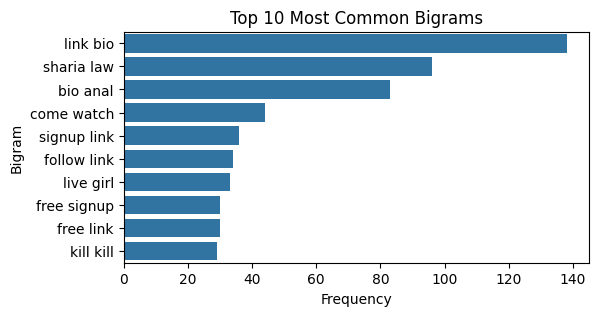

In [272]:
plt.figure(figsize=(6, 3))
sns.barplot(x='count', y='bigram', data=top_10_bigram_df)
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

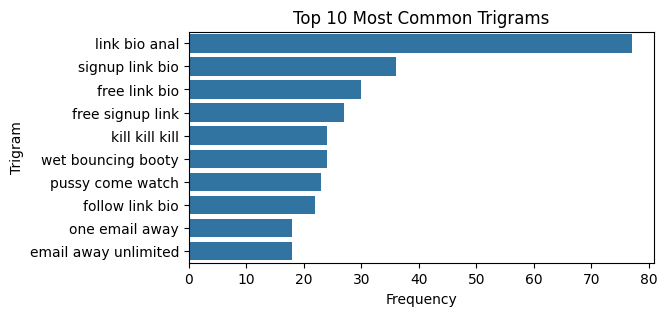

In [273]:
plt.figure(figsize=(6, 3))
sns.barplot(x='count', y='trigram', data=top_10_trigram_df)
plt.title('Top 10 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [250]:
# censor words
bigram_df.loc[10, 'bigram'] = "like n*gga" 
trigram_df.loc[9, 'trigram'] = "wet bouncing b**ty"
trigram_df.loc[13, 'trigram'] = "n*gga went upside"
